<a href="https://colab.research.google.com/github/yuuOkada/Sphere_CNN/blob/master/Make_learning-predict-param.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab Instance起動からの経過時間: 0.5daysでShutdown

In [0]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.312262days (26979.40sec)


Connect to Google Drive File Stream

In [0]:
from google.colab import drive
drive.mount('./gdrive')

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


Show numpy array shape

In [0]:
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"

#np.load内にはデータのパス
X_train, X_test, y_train, y_test = np.load(root_dir+"/img_data.npy", allow_pickle=True)
print(X_train.shape)

(5153, 45, 60, 3)


Sequential CNN model Learning

*shape(45,60,3)*

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 43, 58, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 21, 29, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 19, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 9, 13, 64)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 11, 128)        73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 3, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1920)            

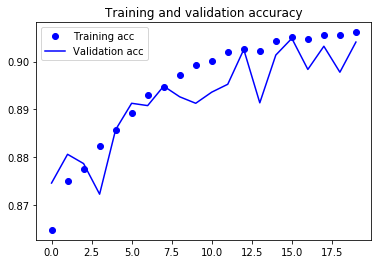

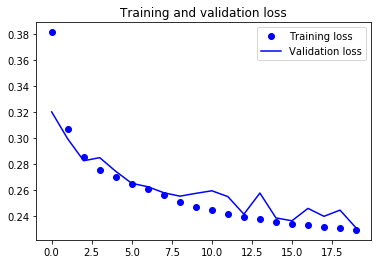

In [0]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow import keras
from keras.utils import np_utils
from keras import optimizers
from keras import layers, models
from keras.utils import plot_model

#画像が保存されているルートディレクトリのパス
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"
# カテゴリ名
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]


###モデルの構築
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(45,60,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3),activation="relu"))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(8,activation="sigmoid")) #分類先の種類分設定
#モデル構成の確認
model.summary()

#モデルの可視化
plot_model(model, to_file=root_dir+'/model.png')


###モデルのコンパイル
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])



###データの準備
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]
nb_classes = len(categories)

#np.load内にはデータのパス
X_train, X_test, y_train, y_test = np.load(root_dir+"/img-data_45-60-3.npy", allow_pickle=True)

#データの正規化
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#kerasで扱えるようにcategoriesをベクトルに変換
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)


###学習
model = model.fit(X_train,
                  y_train,
                  epochs= 20,
                  batch_size=128,
                  validation_data=(X_test,y_test))



###学習結果を表示
acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(root_dir+'/acc_graph')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(root_dir+'/loss_graph')

Sequential CNN model Learning 

Conv2D4-Dence3-RMSprop : *shape(60,110,3)*

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 88, 108, 32)       896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 44, 54, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 42, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 21, 26, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 21, 26, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 19, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 9, 12, 128)       

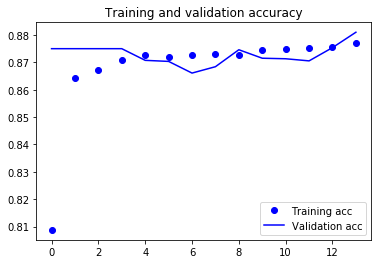

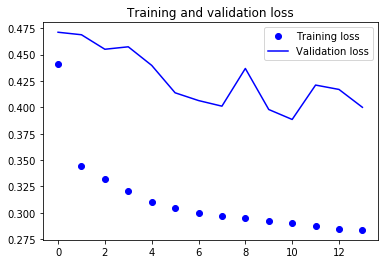

In [0]:
from PIL import Image
import os, glob
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow import keras
from keras.utils import np_utils
from keras import optimizers
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

#画像が保存されているルートディレクトリのパス
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"
# カテゴリ名
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]


###モデルの構築
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(90,110,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(8, activation="sigmoid")) #分類先の種類分設定

#early-stopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='auto') 

#モデル構成の確認
model.summary()

#モデルの可視化
plot_model(model, to_file=root_dir+'/model.png')

###モデルのコンパイル
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])



###データの準備
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]
nb_classes = len(categories)

#np.load内にはデータのパス
X_train, X_test, y_train, y_test = np.load(root_dir+"/img-data_90-110-3.npy", allow_pickle=True)

#データの正規化
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#kerasで扱えるようにcategoriesをベクトルに変換
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)

start_time = time.time()

###学習
model = model.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=512,
                  verbose=1,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop])

stop_time = time.time()

elapsed_time = stop_time - start_time
print("Elapsed Time : " + str(elapsed_time))

###学習結果を表示
acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(root_dir+'/acc_graph')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(root_dir+'/loss_graph')

Sequential CNN model Learning

Conv2D3-Dence3-Adadelta : *shape(60,110,3)*

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 88, 108, 32)       896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 44, 54, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 42, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 21, 26, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 19, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 9, 12, 128)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 13824)           

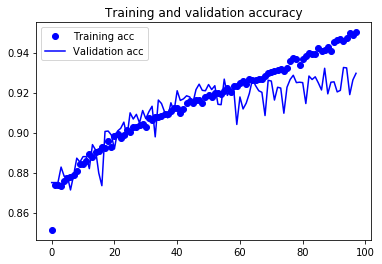

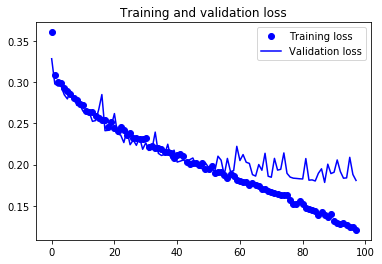

In [0]:
from PIL import Image
import os, glob
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from tensorflow import keras
from keras.utils import np_utils
from keras import optimizers
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

#画像が保存されているルートディレクトリのパス
root_dir = "./gdrive/My Drive/Google Colab/CO191219_proj"
# カテゴリ名
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]


###モデルの構築
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(90,110,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(8, activation="sigmoid")) #分類先の種類分設定

#early-stopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto') 

#モデル構成の確認
model.summary()

#モデルの可視化
plot_model(model, to_file=root_dir+'/model.png')

###モデルのコンパイル
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
              metrics=["acc"])



###データの準備
categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]
nb_classes = len(categories)

#np.load内にはデータのパス
X_train, X_test, y_train, y_test = np.load(root_dir+"/img-data_90-110-3.npy", allow_pickle=True)

#データの正規化
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#kerasで扱えるようにcategoriesをベクトルに変換
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)

start_time = time.time()

###学習
model = model.fit(X_train,
                  y_train,
                  epochs=120,
                  batch_size=256,
                  verbose=1,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop])

stop_time = time.time()

elapsed_time = stop_time - start_time
print("Elapsed Time : " + str(elapsed_time))

###学習結果を表示
acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(root_dir+'/acc_graph')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(root_dir+'/loss_graph')

Save learned model


In [0]:
#モデルの保存
json_string = model.model.to_json()
open(root_dir+'/img_predict.json', 'w').write(json_string)

#重みの保存
hdf5_file = root_dir+"/img_predict.hdf5"
model.model.save_weights(hdf5_file)

Data test

In [0]:
#選択プログラム
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

root_dir="./gdrive/My Drive/Google Colab/CO191219_proj"
#保存したモデルの読み込み
model = model_from_json(open(root_dir+'/img_predict.json').read())
#保存した重みの読み込み
model.load_weights(root_dir+'/img_predict.hdf5')

categories = ["ceiling", "cloth", "floor", "floor-object","hole", "human", "object", "wall"]

#画像を読み込む
img_path = root_dir+str(input())
img = image.load_img(img_path,target_size=(90, 110, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#予測
features = model.predict(x)
print(features)

if features[0,0] == 1:
    print ("ceiling")
elif features[0,1] == 1:
    print ("cloth")
elif features[0,2] == 1:
    print ("floor")
elif features[0,3] == 1:
    print ("floor-object")
elif features[0,4] == 1:
    print ("hole")
elif features[0,5] == 1:
    print ("human")
elif features[0,6] == 1:
    print ("object")
elif features[0,7] == 1:
    print ("wall")
else:
    print("error")


/Image_ForLearn/cloth/inside2-22 (4).jpg
[[0. 0. 0. 0. 0. 0. 1. 0.]]
object
